#Import TensorFlow and other libraries

In [ ]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#Create Model
1. Here first we have created the model with pretrained VGG16 with weights of ImageNet
2. Then added l2 regularizer to all Convolutional layers with learning rate 0.01 to overcome the Overfitting of the model
3. Next, we have freeze the first 11 layers of the model for feature extraction
4. Now stack the feature extractor to the model named as Model
5. Adding Dropout layers to overcome the overfitting of the model
6. Then added a classification head (GlobalAveragePooling)
7. Apply Dense layer to convert these features into a single prediction per image

In [ ]:


model =VGG16(input_shape=(224,224,3),include_top=False,
                                               weights='imagenet')


regularizer = tf.keras.regularizers.l2(0.01)
#Adding regularizer to overcome Overfitting of the model
for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)





for layer in model.layers[:11]:
  layer.trainable=False


Model = Sequential()
for layer in model.layers[:11]:
  layer.trainable=True
  Model.add(layer)
c=0  
for layer in model.layers[11:]:
  Model.add(layer)
  c+=1
  if c%4==0:
    Model.add(Dropout(0.3)) 

Model.add(GlobalAveragePooling2D())
Model.add(Dense(units=4098,activation="relu"))
Model.add(Dense(units=4098,activation="relu"))
Model.add(Dense(units=3, activation="softmax"))

Model.summary()



58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_______________________________________________________

#Load The Saved weights of the trained Model
weights are loaded into layers only if the model share the same name. This is useful for fine-tuning or transfer-learning models where some of the layers have changed.

In [ ]:
Model.load_weights('/content/drive/My Drive/Traffic_Densen(VGG).h5')

#Defining the Ouput's Name
If the Predicted output is 0 then it is Heavy Traffic so on.

In [ ]:
Classes={0:'Heavy Traffic', 1:'Light Traffic', 2:'Moderate Traffic'}

#Predict the Model
1. First set the path for testing image
2.Then read the image and resize it to target size
3. Next Predict the ouput of the image
4. Send the ouptut of the image to classes so that we can know the label of the given image

# **Real Life Prediction for heavy traffic**

Heavy Traffic


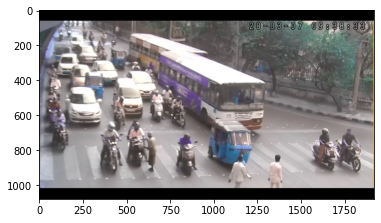

In [ ]:

test_dir='/content/drive/My Drive/new_dataset/test/heavy/frame12528.jpg' #Set the path to check the prediction

img_array = cv2.imread(test_dir) 

plt.imshow(img_array)
new_array = cv2.resize(img_array, (224, 224))  
new_array=new_array.reshape(-1,224,224,3)
predictions = Model.predict(new_array)
test_pred = [np.argmax(probas) for probas in predictions]
print(Classes[test_pred[0]])                      #Printing if the predicted traffic is heavy, moderate or light as predicted by our ML model
plt.show() 

# **Real Life Prediction for Light Traffic**

Light Traffic


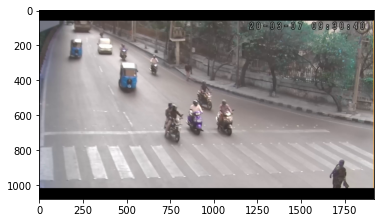

In [ ]:
test_dir='/content/drive/My Drive/new_dataset/test/light/frame1008.jpg' #Set the path to check the prediction

img_array = cv2.imread(test_dir) 

plt.imshow(img_array)
new_array = cv2.resize(img_array, (224, 224))  
new_array=new_array.reshape(-1,224,224,3)
predictions = Model.predict(new_array)
test_pred = [np.argmax(probas) for probas in predictions]
print(Classes[test_pred[0]])       #Printing if the predicted traffic is heavy, moderate or light as predicted by our ML model
plt.show() 

# **Prediction for Moderate Traffic**

Moderate Traffic


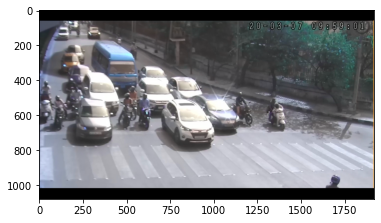

In [ ]:
test_dir='/content/drive/My Drive/new_dataset/test/moderate/frame42816.jpg' #Set the path to check the prediction

img_array = cv2.imread(test_dir) 

plt.imshow(img_array)
new_array = cv2.resize(img_array, (224, 224))  
new_array=new_array.reshape(-1,224,224,3)
predictions = Model.predict(new_array)
test_pred = [np.argmax(probas) for probas in predictions]
print(Classes[test_pred[0]])                              #Printing if the predicted traffic is heavy, moderate or light as predicted by our ML model
plt.show() 